<a href="https://colab.research.google.com/github/feuziq47/pythonML/blob/master/ml4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf=DecisionTreeClassifier(random_state=156)
iris=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=11)

dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [0]:
#graphviz lib를 이용한 decisionTree 모델 시각화1
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file="/content/gdrive/My Drive/ColabML/tree.dot",class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)


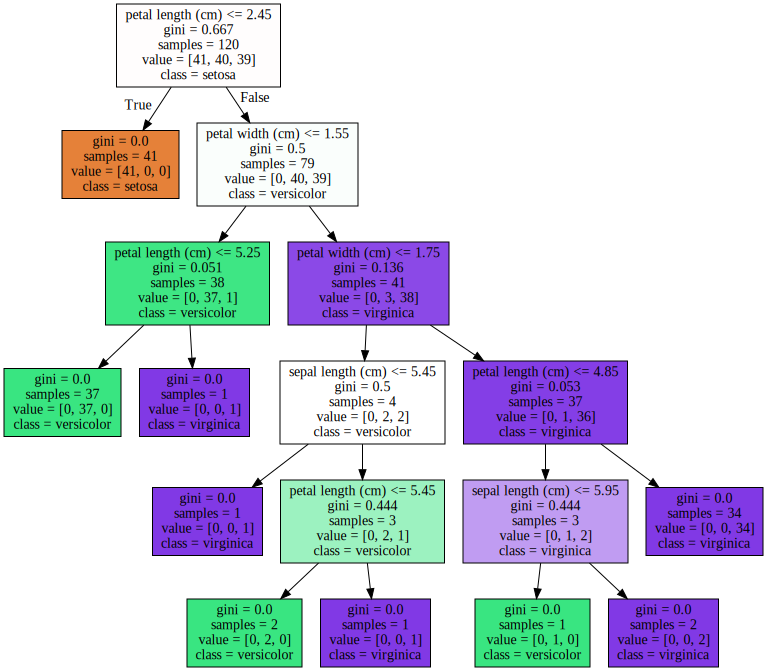

In [0]:
#graphviz lib를 이용한 decisionTree 모델 시각화2
import graphviz
with open('/content/gdrive/My Drive/ColabML/tree.dot')as f:
    dot_graph=f.read()
    
graphviz.Source(dot_graph)

In [0]:
dt_clf=DecisionTreeClassifier(random_state=116)
iris=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=11)

dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=116, splitter='best')

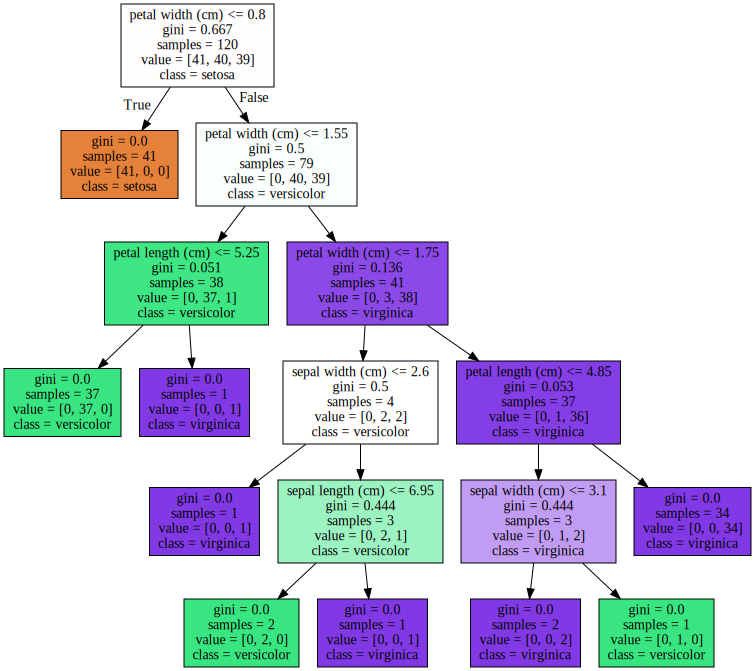

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file="/content/gdrive/My Drive/ColabML/tree.dot",class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)
import graphviz
with open('/content/gdrive/My Drive/ColabML/tree.dot')as f:
    dot_graph=f.read()
    
graphviz.Source(dot_graph)


Feature importances:
[0.017 0.025 0.032 0.926]
sepal length (cm):0.017
sepal width (cm):0.025
petal length (cm):0.032
petal width (cm):0.926


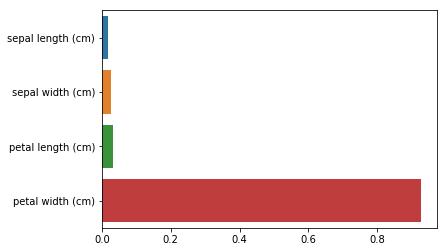

In [0]:
#Feature importance(특성중요도) check
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
#%matplotlib inline

print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))
for name,value in zip(iris.feature_names,dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name,value))
  
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

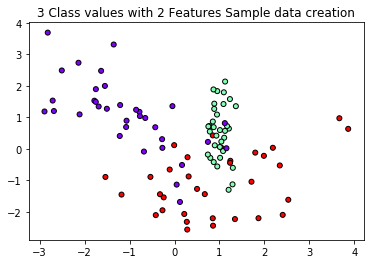

In [0]:
#Decision Node의 결정 경계 시각화1
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

x_features, y_labels = make_classification(n_features=2,n_redundant=0,n_informative=2,n_classes=3,n_clusters_per_class=1,random_state=0)
plt.scatter(x_features[:,0],x_features[:,1],marker='o',c=y_labels,s=25,cmap='rainbow',edgecolor='k')

In [0]:
#Decision Node의 결정 경계 시각화2
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


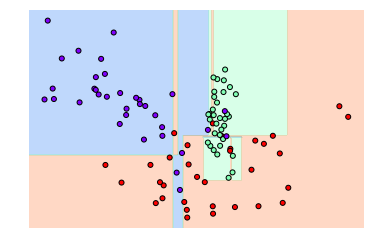

In [0]:
#Decision Node의 결정 경계 시각화3
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier().fit(x_features,y_labels)
visualize_boundary(dt_clf,x_features,y_labels)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


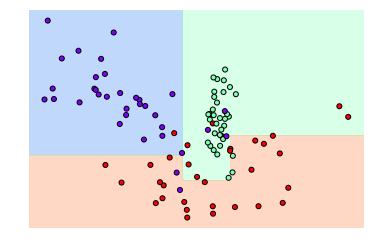

In [0]:
#Decision Node의 결정 경계 시각화4
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(x_features,y_labels)
visualize_boundary(dt_clf,x_features,y_labels)

In [0]:
#위스콘신 유방암 데이터 셋 분석1(Voting Classifier 구현)
import pandas as pd
  
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [0]:
#위스콘신 유방암 데이터 셋 분석2(Voting Classifier 구현)
#0. 모델 생성
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)
#1. clf 객체 생성
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)
#2. clf.fit
vo_clf.fit(x_train,y_train)
#3. predict
pred=vo_clf.predict(x_test)
#4. accuracy 계산
print('Voting Classifier Accuracy:{0:.4f}'.format(accuracy_score(y_test,pred)))

Voting Classifier Accuracy:0.9561


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#위스콘신 유방암 데이터 셋 분석3(Voting Classifier 구현)

classifiers=[lr_clf,knn_clf]

for classifier in classifiers:
  classifier.fit(x_train,y_train)
  pred=classifier.predict(x_test)
  class_name=classifier.__class__.__name__
  print(classifier)
  
  print('{0}Accuracy:{1:.4f}'.format(class_name,accuracy_score(y_test,pred)))
  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegressionAccuracy:0.9474
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')
KNeighborsClassifierAccuracy:0.9386


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Random Forest Classifier 구현 api이용
from sklearn.ensemble import RandomForestClassifier


rf_clf=RandomForestClassifier(n_jobs=-1,random_state=0)
print(rf_clf)
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)
rf_clf.fit(x_train,y_train)
pred=rf_clf.predict(x_test)
accuracy=accuracy_score(y_test,pred)

print('Random Forest Classifier Accuracy:{0:.4f}'.format(accuracy))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Random Forest Classifier Accuracy:0.9386


In [0]:
#Random Forest Classifier 하이퍼 파라미터 튜닝 GridSearch 이용
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[100],'max_depth':[6,8,10,12],'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]}

rf_clf=RandomForestClassifier(n_jobs=-1,random_state=0)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(x_train,y_train)

print('Optimal Hyper Parameter')
print(grid_cv.best_params_)
print('Max Accuracy:{0:.4f}'.format(grid_cv.best_score_))

Optimal Hyper Parameter
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
Max Accuracy:0.9451


In [0]:
rf_clf1=RandomForestClassifier(n_estimators=300,max_depth=6,min_samples_leaf=8,min_samples_split=8,random_state=0)
rf_clf1.fit(x_train,y_train)
pred=rf_clf1.predict(x_test)
print('Accuracy:{0:.4f}'.format(accuracy_score(y_test,pred)))

Accuracy:0.9474


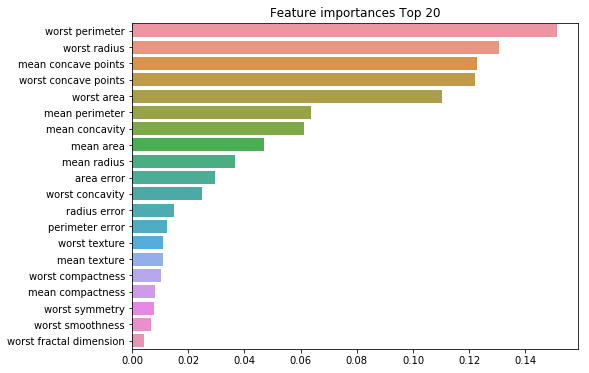

In [0]:
#특성 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = \
pd.Series(ftr_importances_values,index=cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [0]:
#GradientBoost Algorithm1 : 가중치를 업데이트하는 방식이 경사하강법(Gradient Descent) 이용
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

start_time = time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(x_train,y_train)
gb_pred=gb_clf.predict(x_test)
gb_accuracy=accuracy_score(y_test,gb_pred)

print('GBM Accuracy:{0:.4f}'.format(gb_accuracy))
print('GBM training time:{0:.4f}sec'.format(time.time()-start_time))

GBM Accuracy:0.9561
GBM training time:0.1698sec


In [0]:
#GradientBoost Algorithm2 : 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[100,500],'learning_rate':[0.05,0.1]}

grid_cv=GridSearchCV(gb_clf,param_grid=params,cv=2,verbose=1)
grid_cv.fit(x_train,y_train)

print('Optimal Hyper Parameter:\n',grid_cv.best_params_)
print('Max Accuracy:{0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Optimal Hyper Parameter:
 {'learning_rate': 0.1, 'n_estimators': 100}
Max Accuracy:0.9385


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.5s finished


In [0]:
gb_pred=grid_cv.best_estimator_.predict(x_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
print('GBM Accuracy:{0:.4f}'.format(gb_accuracy))

GBM Accuracy:0.9561


In [0]:
grid=GridSearchCV(scoring=recall)
print(grid)

TypeError: ignored

In [0]:
!python -m pip install SMOTE

In [0]:
!python -m pip install imblearn

In [0]:
cd gdrive/My Drive/ColabML

/content/gdrive/My Drive/ColabML


In [0]:
# 신용카드 사기 검출 모델 학습
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE


#데이터 로드
card=pd.read_csv('train.csv')
card_data=card.drop(['Class','Time'],axis=1)
card_target=card['Class']
card_df=pd.DataFrame(card_data,card_target)

#test/train set 분리
x_train,x_test,y_train,y_test=train_test_split(card_data,card_target,test_size=0.2,random_state=7,stratify=card_target)


#oversampling
sm = SMOTE(ratio=0.2,kind='regular',n_jobs=-1)
card_data,card_target=sm.fit_sample(card_data,card_target)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
params={'n_estimators':[100]
        ,'learning_rate':[0.1]
       }
start_time=time.time()
gd=GradientBoostingClassifier(random_state=0)
grid=GridSearchCV(gd,param_grid=params,cv=2,refit=1,scoring='recall')
grid.fit(x_train,y_train)

print('Optimal Hyper Parameter:\n',grid.best_params_)
print('Max Accuracy:{0:.4f}'.format(grid.best_score_))
print('GB training time:{0:.4f}sec'.format(time.time()-start_time))


Optimal Hyper Parameter:
 {'learning_rate': 0.1, 'n_estimators': 100}
Max Accuracy:0.5929
GB training time:306.6023sec


In [0]:
#confusion matrix,precision,recall,accuracy 확인 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    
    print('Confusion Matrixs')
    print(confusion)
    print('Accuracy:{0:.4f},Precision{1:.4f},Recall:{2:.4f}'.format(accuracy,precision,recall))

In [0]:
#최적의 파라미터로 predict 값 생성
gd=GradientBoostingClassifier(random_state=7)
pred=grid.best_estimator_.predict(x_test)

In [0]:
#최적의 파라미터로 성능지표 출력
get_clf_eval(y_test,pred)

Confusion Matrixs
[[39791    13]
 [   22    47]]
Accuracy:0.9991,Precision0.7833,Recall:0.6812


In [0]:
#roc_curve 그래프 그리는 함수
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def ROC_curve_plot(y_test, pred_proba_c1):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    #x축의 lim 값으로 x축의 좌표를 만듦
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.grid()
    plt.show()

In [0]:
gd=GradientBoostingClassifier(random_state=7,learning_rate=0.1)
gd.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

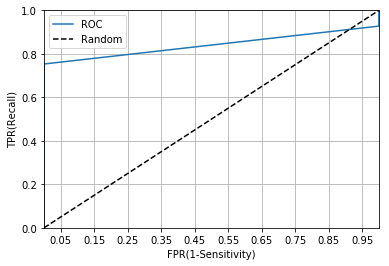

ROC AUC 값:0.8404


In [0]:
#roc_auc_score api를 이용한 AUC 구하기
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pred=gd.predict(x_test)
roc_score=roc_auc_score(y_test,pred)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

In [0]:
#Random Forest Classifier 구현 api이용
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rf_clf=RandomForestClassifier(n_jobs=-1,random_state=0)
rf_clf.fit(x_train,y_train)
pred=rf_clf.predict(x_test)
recall=recall_score(y_test,pred)

print('Random Forest Classifier Recall:{0:.4f}'.format(recall))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier Accuracy:0.6957


In [0]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[10],'max_depth':[6,8,10,12],'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]}

rf_clf=RandomForestClassifier(n_jobs=-1,random_state=0)
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1,scoring='recall')
grid_cv.fit(x_train,y_train)

print('Optimal Hyper Parameter')
print(grid_cv.best_params_)
print('Max Recall:{0:.4f}'.format(grid_cv.best_score_))

Optimal Hyper Parameter
{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 10}
Max Recall:0.7601


In [0]:
rf_clf1=RandomForestClassifier(n_estimators=300,max_depth=12,min_samples_leaf=8,min_samples_split=20,random_state=0,n_jobs=-1)
rf_clf1.fit(x_train,y_train)
pred=rf_clf1.predict(x_test)
print('Recall:{0:.4f}'.format(recall_score(y_test,pred)))

KeyboardInterrupt: ignored

In [0]:

df_test = pd.read_csv('test.csv')


df_y_test = df_test['Class']
df_x_test = df_test.drop(['Time','Class'], axis = 1)

pred = rf_clf1.predict(df_x_test)
get_clf_eval(df_y_test, pred)

roc_score=roc_auc_score(df_y_test,pred)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

Confusion Matrixs
[[85284    11]
 [   50    98]]
Accuracy:0.9993,Precision0.8991,Recall:0.6622
ROC AUC 값:0.8310
